Определите AUC_ROC и AUC_PR для модели логистической регрессии на тестовой выборке. Используйте реализацию модели в виде класса и функцию confusion, чтобы рассчитать TPR, FPR, precision, recal для различных порогов вероятности.

In [19]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

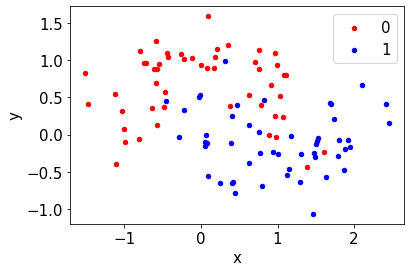

In [20]:
X, y = make_moons(n_samples=100, noise=0.3)
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
lr = LogisticRegression(solver="liblinear")

lr.fit(X_train, y_train)

y_pred = lr.predict(X_valid)

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(y_valid, y_pred)

0.8

In [24]:
y_pred_train = lr.predict(X_train)

accuracy_score(y_train, y_pred_train)

0.84

In [25]:
y_pred_proba = lr.predict_proba(X_valid)

y_pred_proba[:10]

array([[0.4924944 , 0.5075056 ],
       [0.72917759, 0.27082241],
       [0.23406613, 0.76593387],
       [0.92227254, 0.07772746],
       [0.93225487, 0.06774513],
       [0.85569436, 0.14430564],
       [0.08940892, 0.91059108],
       [0.96426967, 0.03573033],
       [0.94637091, 0.05362909],
       [0.07205934, 0.92794066]])

Confusion matrix, without normalization
[[11  2]
 [ 3  9]]


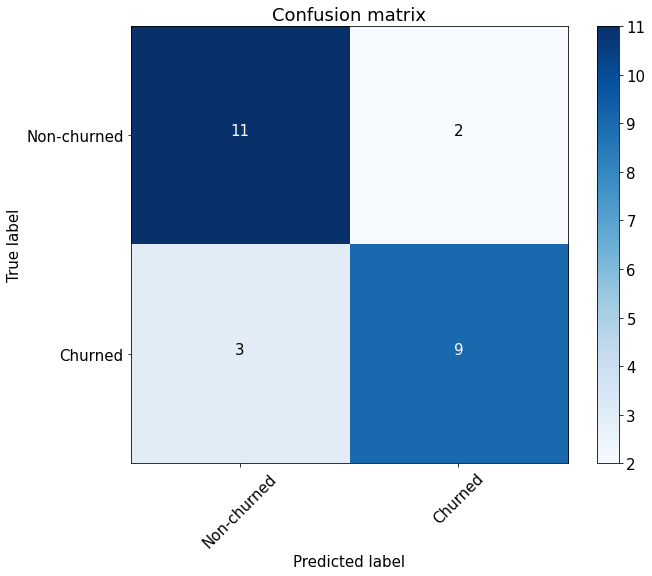

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_valid, lr.predict(X_valid))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid, y_pred)

print(cm)

[[11  2]
 [ 3  9]]


In [28]:
#true positive
TP = ((y_pred == 1) & (y_valid) == 1).sum()
TP

9

In [29]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [30]:
#точность по формуле
precision = TP / (TP + FP)
precision

0.8181818181818182

In [36]:
#точность из библиотеки
from sklearn.metrics import precision_score
precision_score(y_valid, y_pred)

0.8181818181818182

In [38]:
#полнота по формуле
Recall = TP / (TP + FN)
Recall

0.75

In [31]:
#плнота из библиотеки
from sklearn.metrics import recall_score

recall_score(y_valid, y_pred)

0.75

In [32]:
#F1 из библиотеки
from sklearn.metrics import f1_score

f1_score(y_valid, y_pred)

0.7826086956521738

(0.0, 1.0)

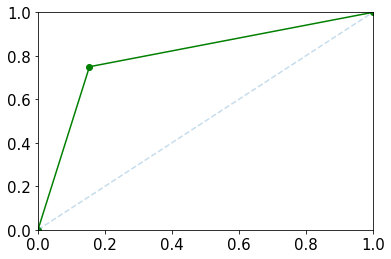

In [33]:
#AUC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, _ = roc_curve(y_valid, y_pred)
plt.plot([0, 1], [0, 1], label="Random", linestyle="--", alpha=0.25)
plt.plot(fpr, tpr, color="green")
plt.scatter(fpr, tpr, color="green")
plt.xlim(0,1)
plt.ylim(0,1)

In [34]:
roc_auc_score(y_valid, y_pred)

0.7980769230769231